In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_diabetes

In [10]:
# Other datasets
# # https://scikit-learn.org/stable/datasets/loading_other_datasets.html

In [11]:
# https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

In [12]:
X,y = load_diabetes(return_X_y=True)

* age age in years
* sex
* bmi body mass index
* bp average blood pressure
* s1 tc, total serum cholesterol
* s2 ldl, low-density lipoproteins
* s3 hdl, high-density lipoproteins
* s4 tch, total cholesterol / HDL
* s5 ltg, possibly log of serum triglycerides level
* s6 glu, blood sugar level

In [13]:
X[1:3,:]

array([[-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [15]:
X.shape, y.shape

((442, 10), (442,))

# Using SKlearn Linear Regreession


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [54]:
X_train.shape, X_test.shape

((353, 10), (89, 10))

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
reg = LinearRegression()

In [57]:
reg.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred = reg.predict(X_test)

In [59]:
from sklearn.metrics import r2_score

In [60]:
r2_score(y_test, y_pred)

0.5651503625247857

In [61]:
reg.coef_

array([  -9.41703884, -252.57934715,  534.64742222,  307.37798524,
       -600.44450444,  318.5469278 ,   61.47107325,  193.13775315,
        703.49998868,   34.19103561])

In [62]:
reg.intercept_

151.70364717227497

# Using Our own Regression Class

In [69]:
class MyLR():
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis = 1)
        
        # Calculate coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
        
        
    def predict(self, X_test):
        y_pred = np.dot(X_test, self.coef_) + self.intercept_
        return y_pred
        

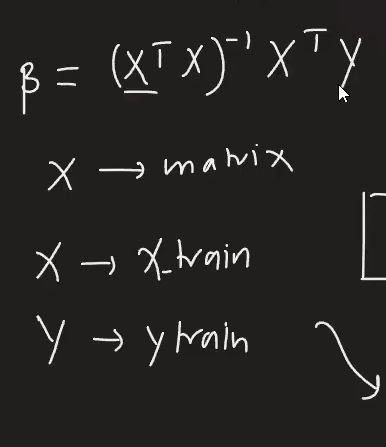

In [70]:
lr = MyLR()

In [71]:
lr.fit(X_train,y_train)

In [72]:
# Add 1 at col index 0
np.insert(X_train,0,1,axis = 1)

array([[ 1.        ,  0.06713621,  0.05068012, ..., -0.03949338,
        -0.01919845,  0.01134862],
       [ 1.        , -0.02730979,  0.05068012, ..., -0.03949338,
        -0.00514219, -0.05078298],
       [ 1.        , -0.05637009,  0.05068012, ...,  0.03430886,
         0.02060939,  0.0569118 ],
       ...,
       [ 1.        ,  0.01991321,  0.05068012, ...,  0.03430886,
         0.00538633,  0.00306441],
       [ 1.        ,  0.02717829,  0.05068012, ...,  0.07120998,
        -0.09643495, -0.05906719],
       [ 1.        , -0.0854304 ,  0.05068012, ..., -0.03949338,
        -0.05780303, -0.04249877]])

In [73]:
np.insert(X_train,0,1,axis = 1).shape,X_train.shape
# new col introducded using np.insert

((353, 11), (353, 10))

In [75]:
y_pred = lr.predict(X_test)

In [76]:
r2_score(y_test, y_pred)

0.5651503625247858